In [63]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [31]:
df = pd.read_csv(r'C:\Users\V.THANUJA\Downloads\archive\mail_data.csv')
#Printing data
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [35]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [37]:
# Check missing values
df.isna().sum()

Category    0
Message     0
dtype: int64

In [39]:
# Check data shape
df.shape

(5572, 2)

<Axes: xlabel='Category'>

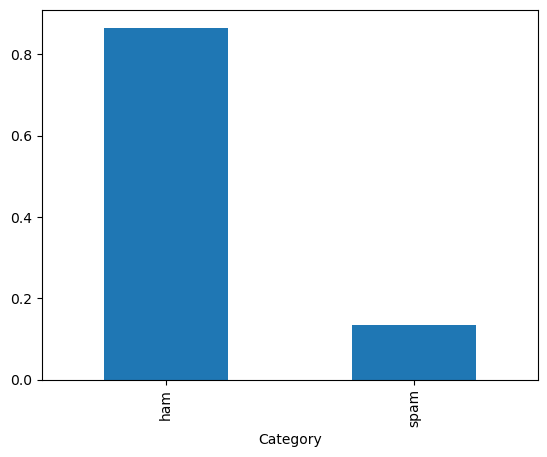

In [41]:
df['Category'].value_counts(normalize = True).plot.bar()

In [43]:
# Declare feature vector and target variable
x = df['Message'].values
y = df['Category'].values

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [47]:
# Converting String to Integer
cv = CountVectorizer()  
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

In [51]:
print(x_train)

  (0, 4809)	1
  (0, 3196)	1
  (0, 2943)	1
  (0, 6861)	1
  (0, 4623)	1
  (0, 3769)	1
  (0, 3781)	1
  (0, 4932)	1
  (0, 3615)	1
  (0, 4084)	1
  (0, 3661)	1
  (0, 957)	1
  (0, 3529)	1
  (1, 3615)	1
  (1, 7751)	1
  (1, 7502)	1
  (1, 1048)	1
  (1, 2990)	1
  (1, 1625)	1
  (1, 3158)	1
  (1, 5021)	1
  (1, 4696)	1
  (1, 816)	1
  (1, 2603)	1
  (1, 4716)	1
  :	:
  (4454, 373)	1
  (4454, 651)	1
  (4454, 4625)	1
  (4454, 2120)	1
  (4454, 110)	1
  (4454, 348)	1
  (4455, 3615)	1
  (4455, 3661)	1
  (4455, 1625)	1
  (4455, 7455)	2
  (4455, 4679)	1
  (4455, 3531)	1
  (4455, 3176)	1
  (4455, 4442)	1
  (4455, 5927)	1
  (4455, 2495)	1
  (4456, 3132)	1
  (4456, 2189)	1
  (4456, 6857)	1
  (4456, 6988)	1
  (4456, 6094)	1
  (4456, 2801)	1
  (4456, 3789)	1
  (4456, 4549)	1
  (4456, 6267)	1


In [53]:
print(x_test)

  (0, 524)	1
  (0, 961)	1
  (0, 1537)	1
  (0, 1625)	1
  (0, 2167)	1
  (0, 2370)	1
  (0, 3152)	2
  (0, 3153)	2
  (0, 3231)	1
  (0, 3410)	3
  (0, 3454)	1
  (0, 3747)	1
  (0, 3769)	3
  (0, 3781)	1
  (0, 3989)	2
  (0, 4129)	1
  (0, 4378)	1
  (0, 4432)	1
  (0, 4599)	1
  (0, 4633)	1
  (0, 4698)	2
  (0, 4845)	1
  (0, 4908)	3
  (0, 4956)	1
  (0, 5187)	1
  :	:
  (1111, 4910)	1
  (1111, 6789)	1
  (1111, 6981)	1
  (1112, 855)	1
  (1112, 935)	1
  (1112, 972)	1
  (1112, 1097)	1
  (1112, 1603)	1
  (1112, 1901)	1
  (1112, 3030)	1
  (1112, 3176)	1
  (1112, 3213)	1
  (1112, 3661)	1
  (1112, 4033)	1
  (1112, 4692)	1
  (1112, 4873)	1
  (1112, 6861)	1
  (1112, 6981)	2
  (1112, 7561)	1
  (1113, 2626)	1
  (1114, 1048)	1
  (1114, 2394)	1
  (1114, 3535)	1
  (1114, 7515)	1
  (1114, 7751)	2


In [55]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 10)
classifier.fit(x_train, y_train)
print(classifier.score(x_test,y_test))

0.9820627802690582
